In [18]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

In [8]:
stats = {
    100000: {
        "file_read": 27.313139306640623,
        "parallel_run_times": [39.4478, 36.6842, 36.5752, 37.2634, 37.8058, 38.156, 39.8724, 39.764]
    },
    1000000: {                                               
        "file_read": 264.16754722595215,
        "parallel_run_times": [323.498, 292.368, 287.384, 285.054, 283.194, 286.19, 283.366, 280.712]
    },
    10000000: {
        "file_read": 2634.1865062713623,
        "parallel_run_times": [3193.2, 3316.12, 3096.86, 3089.24, 2916.92, 2995.1, 3051.48, 3078.08]
    },
    100000000: {
        "file_read": 26542.5,
        "parallel_run_times": [32081.6, 32493.4, 32000, 31569, 29988.8, 29050.4, 27945.4, 29588.8]
    }
}

In [9]:
def amhdals_law(p, s):
    return (1 / (1 - p  + p / s))

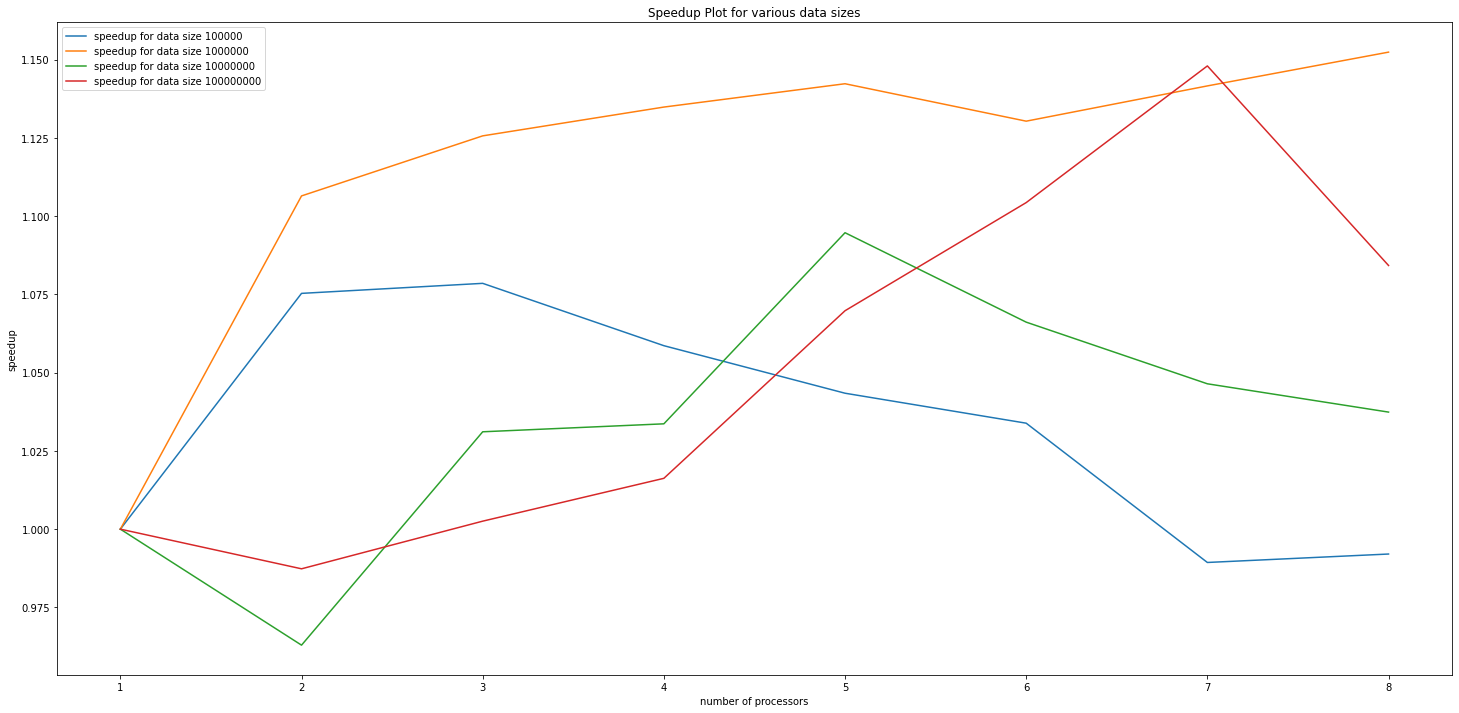

In [23]:
## SPEEDUP PLOT
x = np.array(range(1, 9))
smooth_x = np.linspace(x.min(), x.max(), 300)  

fig, ax = plt.subplots()  # Create a figure and an axes.
fig.set_size_inches(5,12)

for n, stat in stats.items():
    times = stat['parallel_run_times']
    y = [times[0]/t for t in times]
    tck = interpolate.splrep(x, y, s=0)
    ynew = interpolate.splev(smooth_x, tck, der=0)
    #ax.plot(smooth_x, ynew, label=f'speedup for data size {n}')
    ax.plot(x, y, label=f'speedup for data size {n}')
    
ax.set_xlabel('number of processors')
ax.set_ylabel('speedup')
ax.set_title('Speedup Plot for various data sizes')
ax.legend()

Text(0.5, 1.0, 'Execution Time Plot')

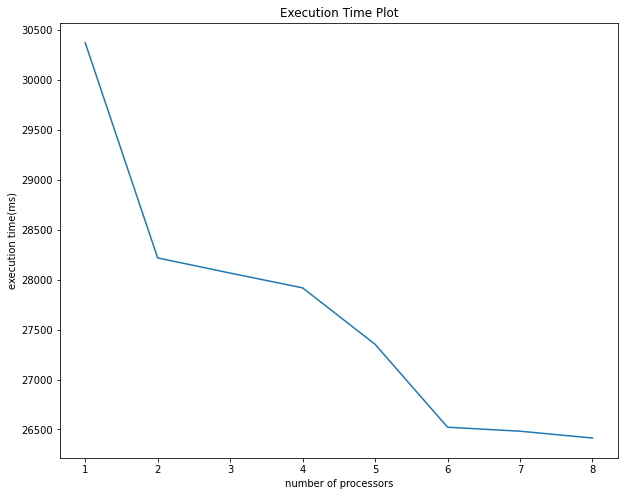

In [4]:
## EXECUTION TIME PLOT

x = range(1, 9)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
fig.set_size_inches(10,8)
ax.plot(x, times_in_ms, label='')  # Plot some data on the axes.
#ax.plot(x, x**2, label='amhdal\'s law')  # Plot more data on the axes...
ax.set_xlabel('number of processors')  # Add an x-label to the axes.
ax.set_ylabel('execution time(ms)')  # Add a y-label to the axes.
ax.set_title("Execution Time Plot")  # Add a title to the axes.
# ax.legend()  # Add a legend.


parallelizable_portion:  0.18101120982771432
[1.0, 1.0763981008985455, 1.0822005406280315, 1.08794837125961, 1.110419803583743, 1.1451888874501255, 1.146920817531752, 1.1498895902118782]
[1.0, 1.6450253032296438, 1.7230241994897033, 1.8069955055188391, 2.219049188944249, 3.3378671488043223, 3.421051764886349, 3.573065386244093]
... 1.4018051266475653
[1.0, 1.0763981008985455, 1.0822005406280315, 1.08794837125961, 1.110419803583743, 1.1451888874501255, 1.146920817531752, 1.1498895902118782]


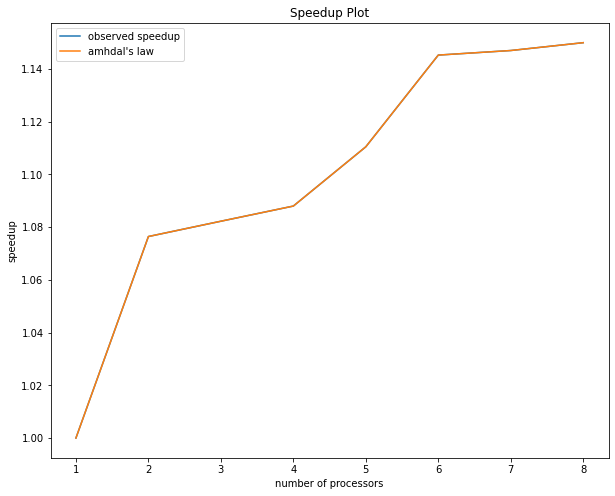

In [5]:
## SPEEDUP PLOT

x = range(1, 9)
parallelizable_portion = (seq_time_ms - file_read_time_ms) / seq_time_ms
observed_speedup = [seq_time_ms / y for y in times_in_ms]
parallel_portion_speedup = [(seq_time_ms - file_read_time_ms)/(y - file_read_time_ms) for y in times_in_ms]
amhdals_y = [amhdals_law(parallelizable_portion, s) for s in parallel_portion_speedup]
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
fig.set_size_inches(10,8)

ax.plot(x, observed_speedup, label='observed speedup')
ax.plot(x, amhdals_y, label='amhdal\'s law')
ax.set_xlabel('number of processors')
ax.set_ylabel('speedup')
ax.set_title("Speedup Plot")
ax.legend()